# Aviation Accident Analysis

## Overview
This project analyzes aviation accident data to identify risk factors affecting severity, aircraft damage, and injuries. This insights will help aviation authorities and manufacturers improve safety protocols, training, and maintenance practices.

## Problem Statement
Aviation accidents pose significant risks to passengers, crew, and aircraft manufacturers. By analyzing historical accident data, I aim to:
1. Determine the impact of weather conditions on Injuries.
2. Aircraft make causing serious but non-fatal accidents.
3. Assess the impact of different flight phases on total aircraft damage.
4. Analyze injuries across different flight phases to identify high-risk stages of flight.

## Data Understanding
The dataset contains aviation accident records, including information on aircraft type, manufacturer, flight phase, weather conditions, and accident outcomes. Key variables include:
- `Event Date`: Date of the accident.
- `Aircraft Manufacturer`: Company that produced the aircraft.
- `Injury Severity`: Classification of injuries (None, Minor, Serious, Fatal).
- `Broad Phase of Flight`: Phase of flight at the time of the accident.
- `Weather Condition`: Weather conditions (VMC - Visual Meteorological Conditions, IMC - Instrument Meteorological Conditions).

## Data Preparation

In [383]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style("whitegrid")
sns.set_context('talk')

In [384]:
# Loading the dataset
df = pd.read_csv("AviationData.csv", encoding="latin1", low_memory=False)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


### Understanding the dataset

In [385]:
# Inspecting the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

- The dataset has 88,889 rows and 31 columns
- Several columns have missing values (eg. `` Aircraft.damage ``, `` Aircraft.Category `` etc)

In [386]:
# show the total number of missing values in each column
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

## Data Cleaning and Normalization
Unnecessary columns will be removed, and missing or inconsistent values will be handled to ensure data quality.

In [387]:
# gives the columns names in the dataset
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [388]:
# Keep only relevant columns
columns_to_keep = ['Aircraft.damage', 'Make', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Weather.Condition', 'Broad.phase.of.flight']
df = df[columns_to_keep]
df.head()

,Aircraft.damage,Make,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Weather.Condition,Broad.phase.of.flight
0,Destroyed,Stinson,2.0,0.0,0.0,UNK,Cruise
1,Destroyed,Piper,4.0,0.0,0.0,UNK,Unknown
2,Destroyed,Cessna,3.0,NaN,NaN,IMC,Cruise
3,Destroyed,Rockwell,2.0,0.0,0.0,IMC,Cruise
4,Destroyed,Cessna,1.0,2.0,NaN,VMC,Approach


In [389]:
# several columns have missing values 
# total number of missing values in each column
df.isna().sum()

Aircraft.damage            3194
Make                         63
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Weather.Condition          4492
Broad.phase.of.flight     27165
dtype: int64

- From the missing values in the columns above, I will remove the missing values in the columns ``Aircraft.damage`` , ``Make`` , and `` Weather.Condition``
- I will replace the columns ``Total.Fatal.Injuries``, ``Total.Serious.Injuries`` , ``Total.Minor.Injuries `` and ``Broad.phase.of.flight``

### Dealing with missing values

In [390]:
# remove the missing values in the 3 columns
df.dropna(subset=["Aircraft.damage", "Make", "Weather.Condition"],inplace=True)
df.head()

,Aircraft.damage,Make,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Weather.Condition,Broad.phase.of.flight
0,Destroyed,Stinson,2.0,0.0,0.0,UNK,Cruise
1,Destroyed,Piper,4.0,0.0,0.0,UNK,Unknown
2,Destroyed,Cessna,3.0,NaN,NaN,IMC,Cruise
3,Destroyed,Rockwell,2.0,0.0,0.0,IMC,Cruise
4,Destroyed,Cessna,1.0,2.0,NaN,VMC,Approach


In [391]:
# rechecking whether they have been removed
df.isna().sum()

Aircraft.damage               0
Make                          0
Total.Fatal.Injuries      10703
Total.Serious.Injuries    11845
Total.Minor.Injuries      11114
Weather.Condition             0
Broad.phase.of.flight     22124
dtype: int64

### Replacing the remaining columns 

In [392]:
# Replace the Broad.phase.of.flight column with Unknown 
# I want to assume for the missing values, the phase of flight was unknown 
df["Broad.phase.of.flight"].fillna("Unknown", inplace=True)
df.head()

,Aircraft.damage,Make,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Weather.Condition,Broad.phase.of.flight
0,Destroyed,Stinson,2.0,0.0,0.0,UNK,Cruise
1,Destroyed,Piper,4.0,0.0,0.0,UNK,Unknown
2,Destroyed,Cessna,3.0,NaN,NaN,IMC,Cruise
3,Destroyed,Rockwell,2.0,0.0,0.0,IMC,Cruise
4,Destroyed,Cessna,1.0,2.0,NaN,VMC,Approach


### Standardizing the ``Weather.Condition`` and ``Make`` column

In [393]:
# check the unique weather conditions
df['Weather.Condition'].unique()

array(['UNK', 'IMC', 'VMC', 'Unk'], dtype=object)

In [394]:
# Standardize weather condition labels
df['Weather.Condition'] = df['Weather.Condition'].replace({'Unk': 'UNK'})

In [395]:
df['Weather.Condition'].unique()

array(['UNK', 'IMC', 'VMC'], dtype=object)

- The `Weather.Condition` column names have been standardized

In [396]:
# View unique values
df['Make'].value_counts() 

Cessna                 21949
Piper                  11874
CESSNA                  4283
Beech                   4245
PIPER                   2515
                       ...  
Cutler                     1
Burchfield                 1
Ashcraft                   1
Frimelt Werner Moni        1
Vicari                     1
Name: Make, Length: 7965, dtype: int64

- The `Make` column has values such as Cessna and CESSNA that mean the same

In [397]:
# fix inconsistencies
df["Make"] = df["Make"].str.title().str.strip()

# recheck
df['Make'].value_counts()

Cessna                       26232
Piper                        14389
Beech                         5142
Bell                          2482
Mooney                        1290
                             ...  
Birdman Enterprises, Inc.        1
Clapp                            1
Chilian                          1
Leslie Briggs                    1
Vicari                           1
Name: Make, Length: 7364, dtype: int64

### Dealing with the Injuries columns

In [398]:
# Convert the columns to numeric
df['Total.Fatal.Injuries'] = pd.to_numeric(df['Total.Fatal.Injuries']).astype('Int64')
df['Total.Serious.Injuries'] = pd.to_numeric(df['Total.Serious.Injuries']).astype('Int64')
df['Total.Minor.Injuries'] = pd.to_numeric(df['Total.Minor.Injuries']).astype('Int64')

# Replace the missing values in the Injuries columns with 0 (to mean maybe there were no injuries)
df[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']] = df[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].fillna(0)
df.head()

,Aircraft.damage,Make,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Weather.Condition,Broad.phase.of.flight
0,Destroyed,Stinson,2,0,0,UNK,Cruise
1,Destroyed,Piper,4,0,0,UNK,Unknown
2,Destroyed,Cessna,3,0,0,IMC,Cruise
3,Destroyed,Rockwell,2,0,0,IMC,Cruise
4,Destroyed,Cessna,1,2,0,VMC,Approach


In [399]:
# Recheck for any missing values
df.isna().sum()

Aircraft.damage           0
Make                      0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Weather.Condition         0
Broad.phase.of.flight     0
dtype: int64

In [400]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82336 entries, 0 to 88886
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Aircraft.damage         82336 non-null  object
 1   Make                    82336 non-null  object
 2   Total.Fatal.Injuries    82336 non-null  Int64 
 3   Total.Serious.Injuries  82336 non-null  Int64 
 4   Total.Minor.Injuries    82336 non-null  Int64 
 5   Weather.Condition       82336 non-null  object
 6   Broad.phase.of.flight   82336 non-null  object
dtypes: Int64(3), object(4)
memory usage: 5.3+ MB


- Now the dataset is clean with no missing values
- The dataset has 82,336 rows and 7 columns

## Data Analysis

### Objective 1: Impact of weather conditions on Injuries

In [401]:
# group by weather condition and calculate the mean of the injuries
weather_impact = df.groupby('Weather.Condition')[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum()

<Figure size 864x432 with 0 Axes>

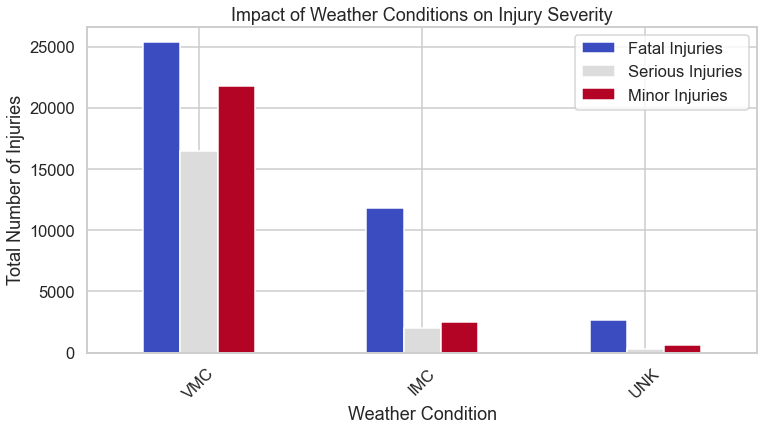

In [402]:
# Create a total injuries column to sort by
weather_impact['Total.Injuries'] = weather_impact.sum(axis=1)

# Sort the DataFrame by total injuries in descending order
weather_impact_sorted = weather_impact.sort_values(by='Total.Injuries', ascending=False).drop(columns=['Total.Injuries'])

# Plot a bar plot
plt.figure(figsize=(12, 6))
weather_impact_sorted.plot(kind='bar', colormap='coolwarm', figsize=(12, 6))

plt.xlabel('Weather Condition')
plt.ylabel('Total Number of Injuries')
plt.title('Impact of Weather Conditions on Injury Severity')
plt.legend(['Fatal Injuries', 'Serious Injuries', 'Minor Injuries'])
plt.xticks(rotation=45)

plt.show();

Key Insights:
- Visual meteorological conditions (VMC) and instrument meteorological conditions (IMC) weather conditions cause more fatal injuries.

- In VMC, pilots may make last minute maneuvers which can lead to high speed crashes causing more fatal injuries.
- In IMC, pilots use instruments due to poor visibility leading to high speed crashes and more fatal injuries.

### Objective 2: Aircraft make causing serious but non-fatal accidents

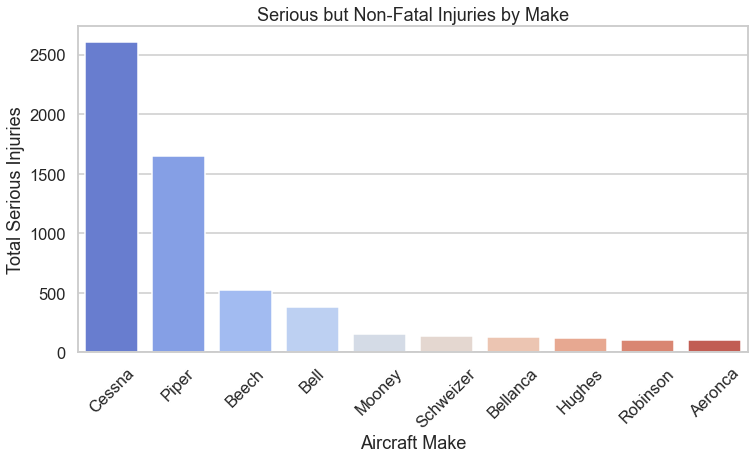

In [403]:
# Filter cases with serious injuries but no fatalities
serious_non_fatal_df = df[(df['Total.Serious.Injuries'] > 0) & (df['Total.Fatal.Injuries'] ==0)]
                       
# Count occurrences by manufacturer
manufacturer_counts = serious_non_fatal_df['Make'].value_counts().head(10)

# Plot the top 10 manufacturers
plt.figure(figsize=(12,6))
sns.barplot(x=manufacturer_counts.index, y=manufacturer_counts.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.xlabel('Aircraft Make')
plt.ylabel('Total Serious Injuries')
plt.title('Serious but Non-Fatal Injuries by Make')
plt.show();

Key Insights:

- From the visualization, Cessna and Piper manufacturers have more serious but non-fatal accidents

- These manufacturers have the highest number of accidents with serious injuries but no fatalities, suggesting they may require targeted maintenance to reduce the number of injuries caused.

### Objective 3: Impact of flight phases on aircraft damage

In [404]:
# unique value counts
df['Broad.phase.of.flight'].value_counts()

Unknown        22655
Landing        15186
Takeoff        12340
Cruise          9930
Maneuvering     8094
Approach        6428
Climb           1909
Taxi            1861
Descent         1724
Go-around       1346
Standing         750
Other            113
Name: Broad.phase.of.flight, dtype: int64

In [405]:
# unique value counts
df['Aircraft.damage'].value_counts()

Substantial    62404
Destroyed      17637
Minor           2253
Unknown           42
Name: Aircraft.damage, dtype: int64

<Figure size 864x432 with 0 Axes>

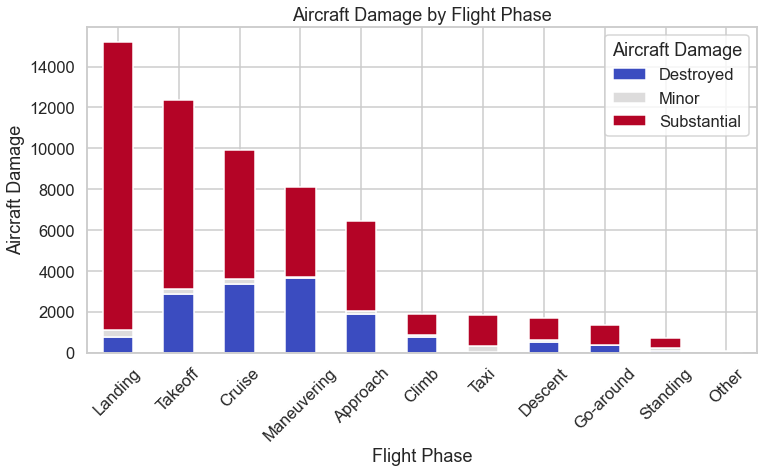

In [406]:
# I want to know the exact phase of flight where accidents cause more aircraft damages
# Remove 'Unknown' values in 'Broad.phase.of.flight'
df_filtered = df[df['Broad.phase.of.flight'] != "Unknown"]

# Count occurrences of each aircraft damage type per flight phase
damage_counts = df_filtered.groupby("Broad.phase.of.flight")["Aircraft.damage"].value_counts().unstack()

# Order the bars by total aircraft damage (from highest to lowest)
damage_counts = damage_counts.reindex(damage_counts.sum(axis=1).sort_values(ascending=False).index)

# Plot the results
plt.figure(figsize=(12, 6))
damage_counts.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(12, 6))

plt.xlabel("Flight Phase")
plt.ylabel("Aircraft Damage")
plt.title("Aircraft Damage by Flight Phase")
plt.xticks(rotation=45)
plt.legend(title="Aircraft Damage")
plt.show();

Key Insights:
- Maneuvering and Cruise phases see the highest destruction, showing mid-air collisions and loss of control cause complete destruction to the aircraft.

- Landing and Takeoff lead to more substantial damage. This suggests that gear failures when landing or runway overruns cause significant but not severe damage to the aircrafts.

### Objective 4: Number of Injuries in each Flight Phase

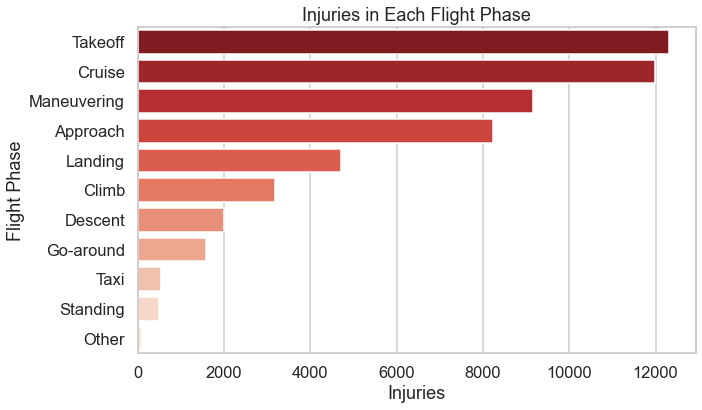

In [407]:
# Create 'Total Injuries' column summing injury types
df["Total Injuries"] = df["Total.Fatal.Injuries"] + df["Total.Serious.Injuries"] + df["Total.Minor.Injuries"]

# Filter out unknown flight phases
df_filtered = df[df["Broad.phase.of.flight"] != "Unknown"]

# Group by Flight Phase and sum the injuries
injuries_by_phase = df_filtered.groupby("Broad.phase.of.flight")["Total Injuries"].sum().reset_index()

# Sort by number of injuries
injuries_by_phase = injuries_by_phase.sort_values(by="Total Injuries", ascending=False)  

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(y="Broad.phase.of.flight", x="Total Injuries", data=injuries_by_phase, palette="Reds_r")

plt.ylabel("Flight Phase")
plt.xlabel("Injuries")
plt.title("Injuries in Each Flight Phase")

plt.show()

## Conclusions and Recommendations

1. Weather plays a major role in the severity of aviation accidents.
    - Fatal injuries are worse in visual meteorological conditions (VMC) and instrument meteorological conditions (IMC)
    - Last minute maneuvers and poor visibility lead to high speed crashes causing more fatal injuries

    **Recommendation**: Improve pilot training for decision-making in poor weather conditions.

2. Some aircraft types may have higher accident rates due to operational or maintenance factors.
    - This suggests maintenance issues that require attention to reduce injuries.

    **Recommendation**: Conduct targeted safety inspections and maintenance improvements for Cessna and Piper aircraft.

3.  Different flight phases pose unique risks that impact aircraft damage severity.
    - Maneuvering and Cruise phases have the most destroyed aircraft due to mid-air crashes and loss of control.
    - Landing and Takeoff cause more substantial damage from gear failures or runway overruns.

 **Recommendation**: Enhance safety measures during Maneuvering and Cruise phases to prevent complete aircraft destruction.